In [8]:
import sys
import numpy as np

def lonlat2xy(n0x, n0y, p0lonmin, p0lonmax, p0latmin, p0latmax, r1dat, r0dat, r0lon, r0lat):
    """
    cnt   fortran starts from 1 but python starts 0 then adding 0.5 is removed from original igeti0x.f
    cby   2010/03/31, hanasaki, NIES: H08 ver1.0
    c
    c       (plonmin,platmin)
    c         /
    c        /________   __________
    c        |      |       |       |
    c        |(0, 0)|  ...  |(nx, 0)|
    c        |______|__   __|_______|
    c        |      |               |
    c           .     .
    c           .       .
    c           .         .
    c        |______|__   __________|
    c        |      |       |       |
    c        |(0,ny)|  ...  |(nx,ny)|
    c        |______|__   __|_______|
    c
    """

    # load file
    n0x = int(n0x)
    n0y = int(n0y)
    p0lonmin = float(p0lonmin)
    p0lonmax = float(p0lonmax)
    p0latmin = float(p0latmin)
    p0latmax = float(p0latmax)
    r0dat = float(r0dat)
    r0lon = float(r0lon)
    r0lat = float(r0lat)

    if p0lonmin <= r0lon <= p0lonmax:
        i0x = int((r0lon - p0lonmin)/(p0lonmax - p0lonmin) * float(n0x))
    else:
        i0x = 1e20
        
    if p0latmin <= r0lat <= p0latmax:
        i0y = int((p0latmax - r0lat)/(p0latmax-p0latmin) * float(n0y))
    else:
        i0y = 1e20
    
    r1dat[i0y, i0x] = r0dat

    return r1dat

In [25]:
WUPPATH = '/mnt/c/Users/tsimk/Downloads/dotfiles/h08/global_city/dat/cty_lst_/gpw4/WUP2018_300k_2010.txt'

tmpfile = np.zeros((21600, 43200))

index = 1
for l in open(WUPPATH).readlines():
    data = l[:].split('\t')
    data = [item.strip() for item in data]
    r0lat = float(data[1])
    r0lon = float(data[2])
    tmpfile = lonlat2xy(43200, 21600, -180, 180, -90, 90, tmpfile, index, r0lon, r0lat)
    index += 1

1400.0
1.0


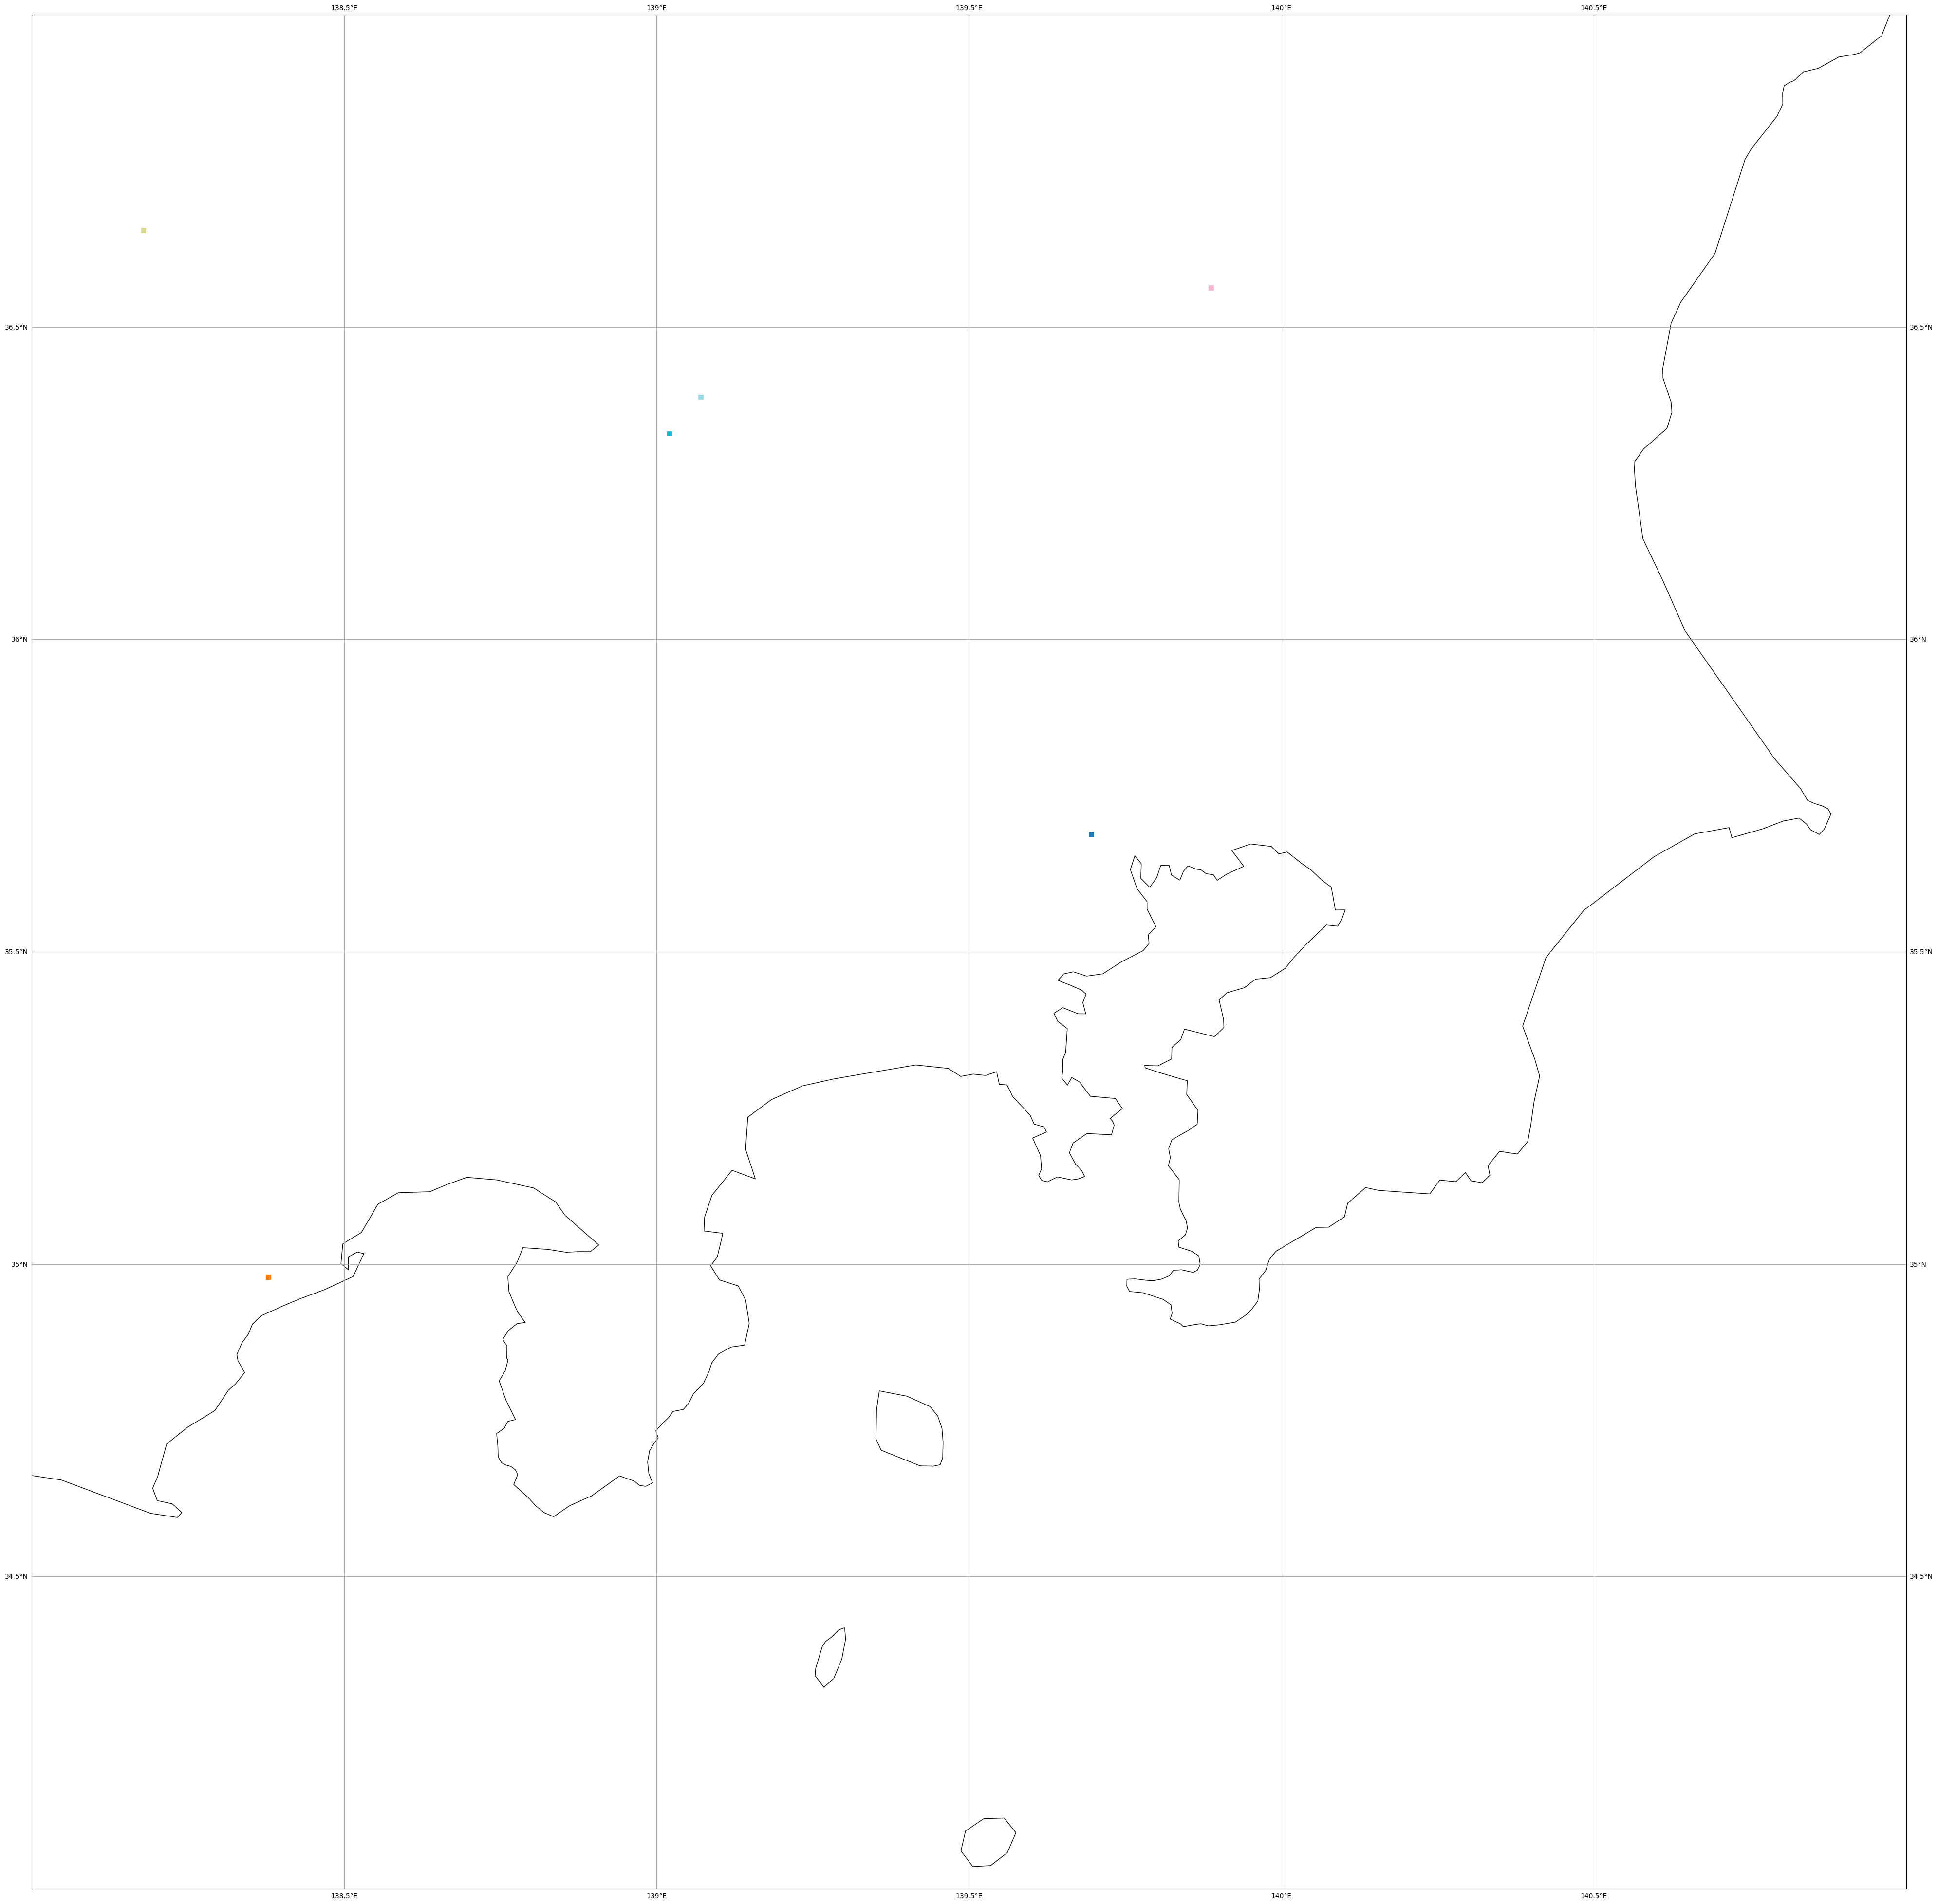

In [30]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfea

def geography():
    SUF = '.30s'
    dtype = 'float32'
    #
    a = 21600
    b = 43200
    gl2shape = (a, b)
    #
    city_num = 1
    #
    # region
    one = 138
    two = 141
    three = 34
    four = 37
    #left = 137
    #right = 141
    #bottom = 34
    #top = 38
    #
    resolution = 120
    upperindex = (90-four)*resolution
    lowerindex = (90-three)*resolution
    leftindex = (180+one)*resolution
    rightindex = (180+two)*resolution
    #
    rgnshape = (lowerindex-upperindex, rightindex-leftindex)
    #
    img_extent = (one, two, three, four)
    
    return a, b, upperindex, lowerindex, leftindex, rightindex, rgnshape, img_extent, city_num
    
a, b, upperindex, lowerindex, leftindex, rightindex, rgnshape, img_extent, city_num = geography()
tmp_cropped = tmpfile[upperindex:lowerindex, leftindex:rightindex]
cropped_masked = np.ma.masked_where(tmp_cropped == 0, tmp_cropped)
print(np.max(cropped_masked))
print(np.min(cropped_masked))

fig = plt.figure(figsize=(50,50))
projection = ccrs.PlateCarree()
ax = plt.subplot(projection=projection)
ax.coastlines()
ax.set_extent(img_extent)
ax.gridlines(draw_labels=True)
im = ax.imshow(cropped_masked, origin='upper',extent=img_extent, transform=projection, cmap='tab20')

1400.0
1.0


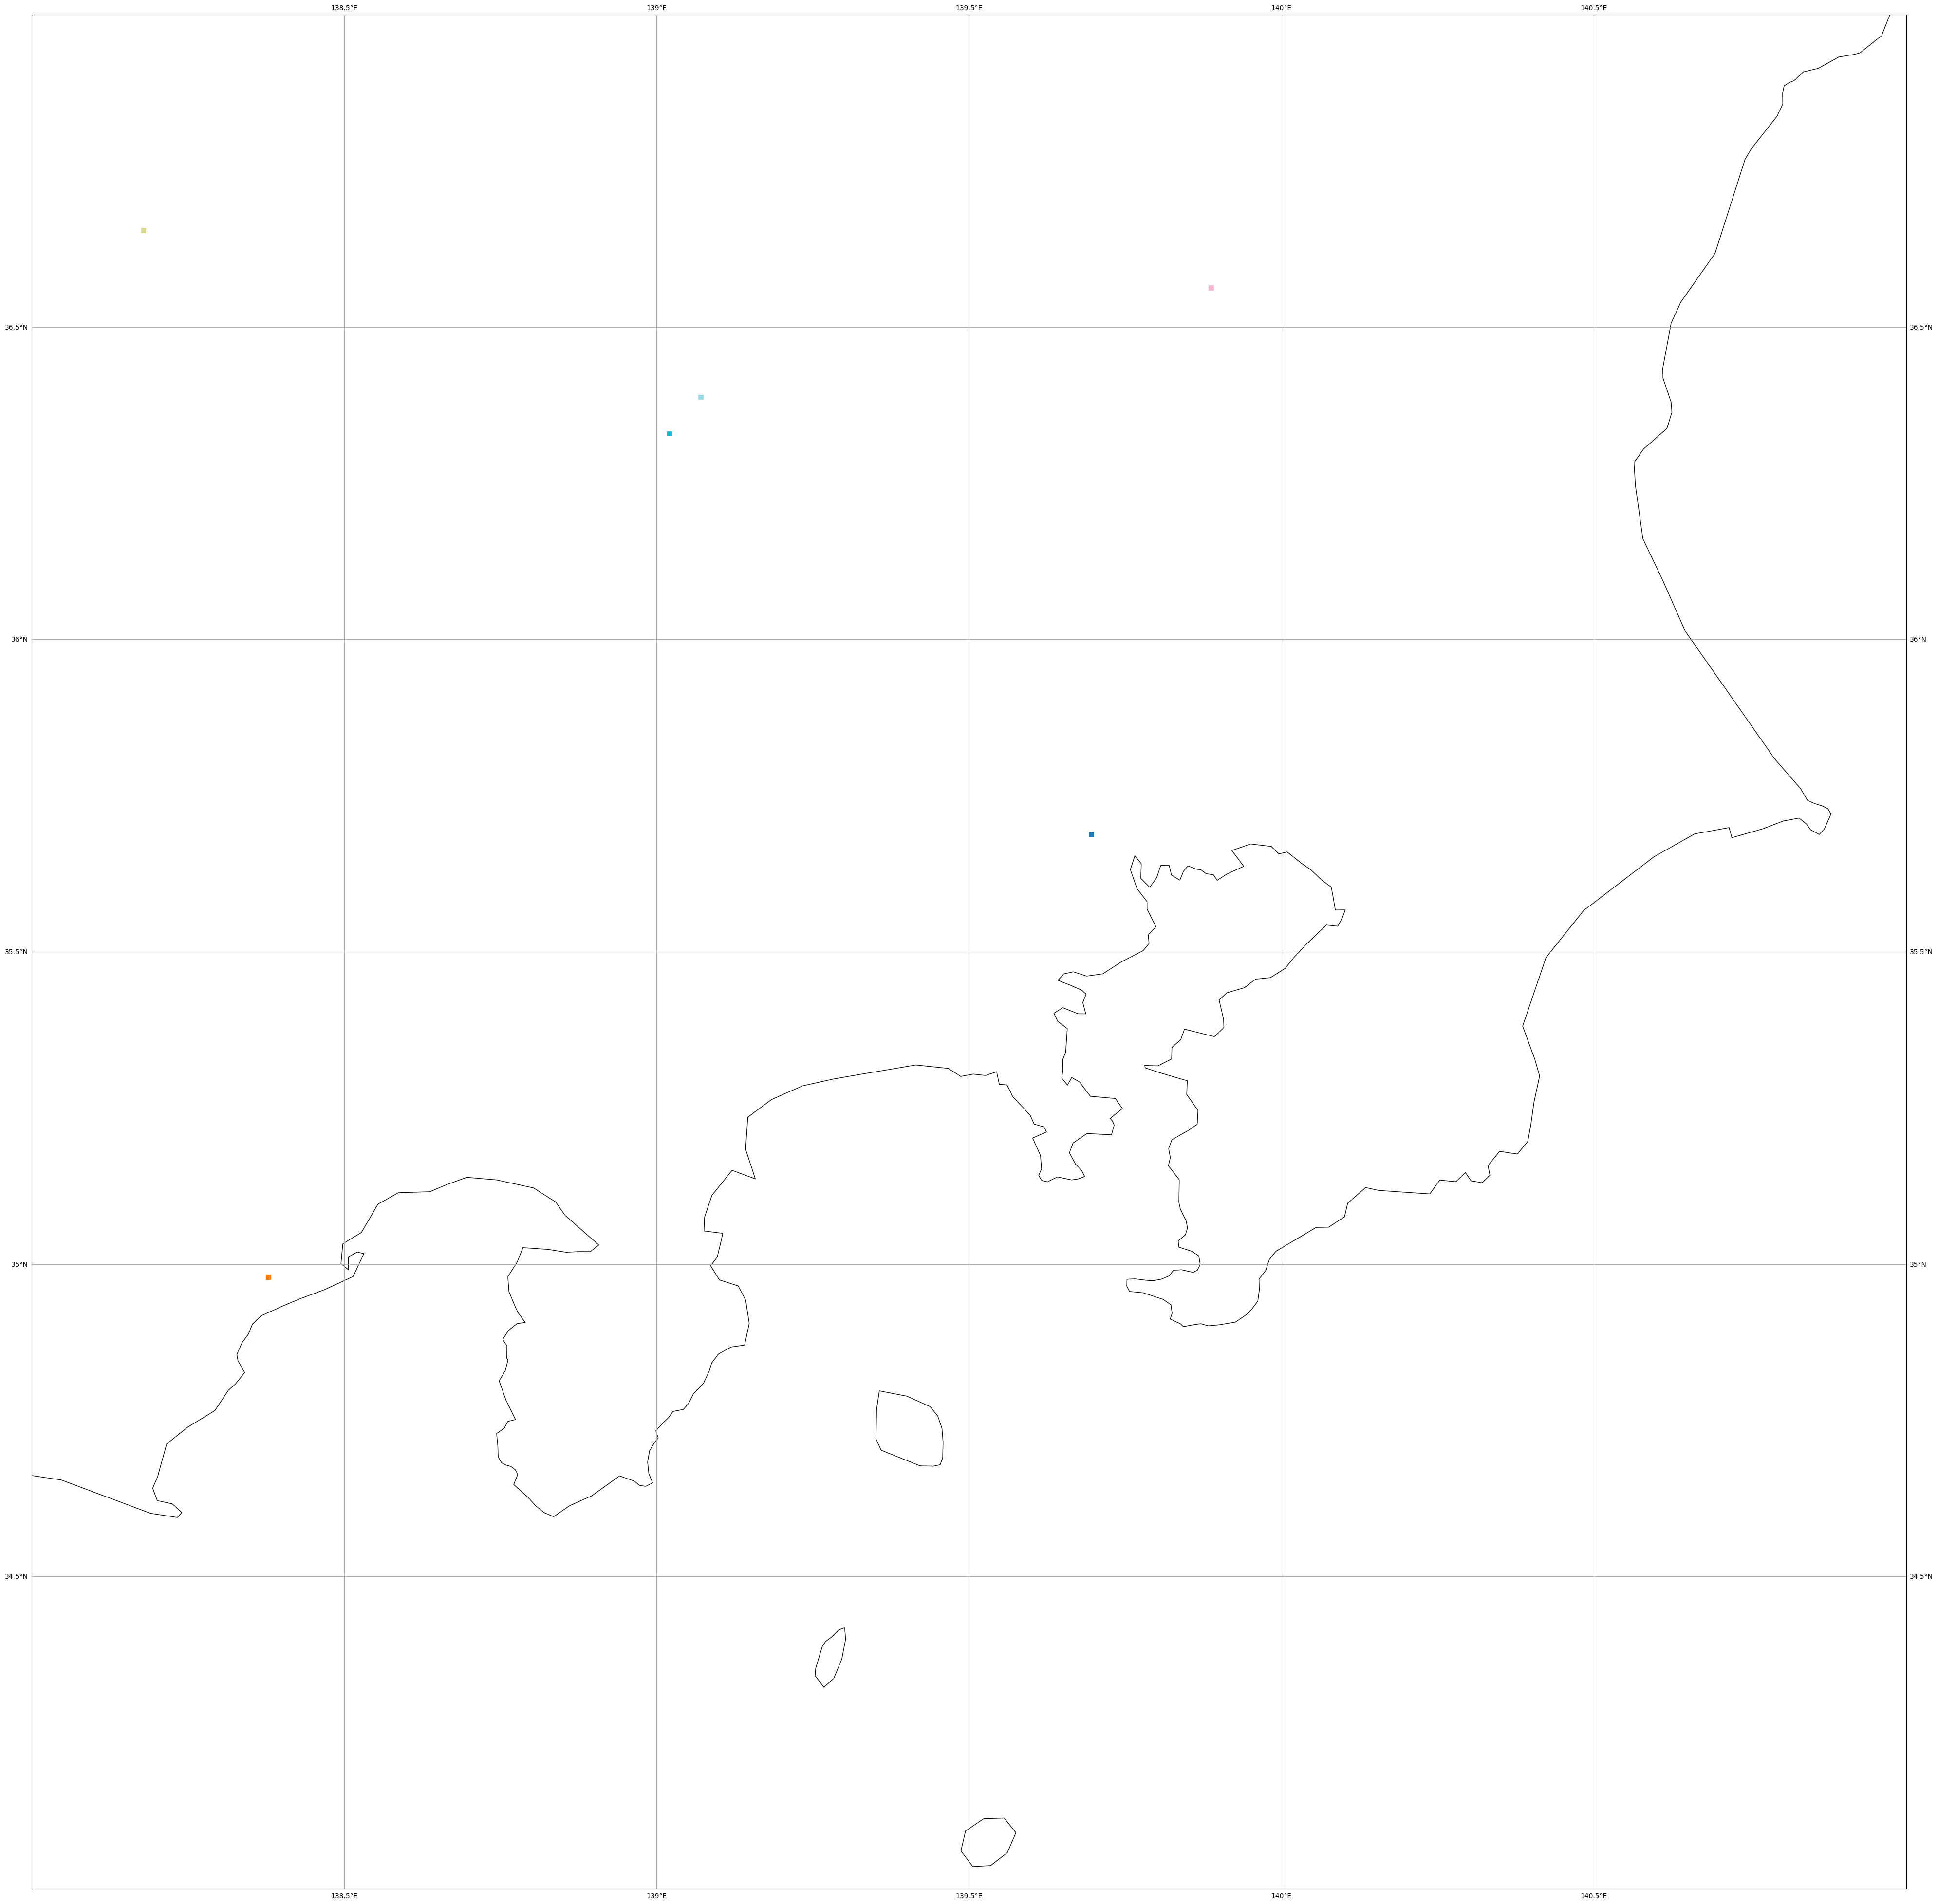

In [33]:
a = 21600
b = 43200
path = '/mnt/c/Users/tsimk/Downloads/dotfiles/h08/global_city/dat/cty_cnt_/gpw4_30s/cityclrd0000.30s'
gpw = np.fromfile(path, dtype='float32').reshape(a, b)
a, b, upperindex, lowerindex, leftindex, rightindex, rgnshape, img_extent, city_num = geography()
gpw_cropped = gpw[upperindex:lowerindex, leftindex:rightindex]
gpw_cropped_masked = np.ma.masked_where(gpw_cropped == 0, gpw_cropped)
print(np.max(gpw_cropped_masked))
print(np.min(gpw_cropped_masked))

fig = plt.figure(figsize=(50,50))
projection = ccrs.PlateCarree()
ax = plt.subplot(projection=projection)
ax.coastlines()
ax.set_extent(img_extent)
ax.gridlines(draw_labels=True)
im = ax.imshow(gpw_cropped_masked, origin='upper',extent=img_extent, transform=projection, cmap='tab20')